In [27]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

In [28]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.optimizers import SGD

In [29]:
def input_data():

    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Reshape to be samples*pixels*width*height
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

    # One hot Cpde
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    num_classes = y_test.shape[1]

    # convert from integers to floats
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    # normalize to range [0, 1]
    X_train = (X_train / 255.0)
    X_test = (X_test / 255.0)

    return X_test, y_test, X_train, y_train

In [30]:
def create_model():
    # Create model
    # Building CNN
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [31]:
def evaluate_model(X_train, y_Train, n_folds=5):

    accuracy, data = list(), list()

    # prepare 5-cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)

    for x_train, x_test in kfold.split(X_train):
        # create model
        model = create_model()
        # select rows for train and test
        trainX, trainY, testX, testY = X_train[x_train], y_Train[x_train], X_train[x_test], y_Train[x_test]
        # fit model
        data_fit = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=32)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        # stores accuracy
        accuracy.append(acc)
        data.append(data_fit)
    return accuracy, data

In [32]:
def summarize_diagnostics(data):
    for i in range(len(data)):
        # plot loss
        pyplot.subplot(2, 1, 1)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(data[i].history['loss'], color='red', label='green')
        pyplot.plot(data[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        pyplot.subplot(2, 1, 2)
        pyplot.title('Classification Accuracy')
        pyplot.plot(data[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(data[i].history['val_accuracy'], color='orange', label='test')
    pyplot.show()

In [33]:
def summarize_performance(acc):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (numpy.mean(acc) * 100, numpy.std(acc) * 100, len(acc)))

    # box and whisker plots of results
    pyplot.boxplot(acc)
    pyplot.show()

In [34]:
def test(X_train, model):
    test_images = X_train[1:5]
    test_images = test_images.reshape(test_images.shape[0], 28, 28)

    for i, test_image in enumerate(test_images, start=1):
        org_image = test_image
        test_image = test_image.reshape(1, 28, 28, 1)
        prediction = np.argmax(model.predict(test_image), axis=-1)
        print("Predicted digit: {}".format(prediction[0]))
        plt.subplot(220 + i)
        plt.axis('off')
        plt.title("Predicted digit: {}".format(prediction[0]))
        plt.imshow(org_image, cmap=plt.get_cmap('gray'))

    plt.show()

In [35]:
def run():
    X_test, y_test, X_train, y_train = input_data()

    # Evaluate
    #accuracy, data = evaluate_model(X_train, y_train)
    #summarize_diagnostics(data)
    #summarize_performance(accuracy)
    model = create_model()
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=256)
    # TEST
    # for images already
    test(X_train, model)


    # save model and architecture to single file
    model.save("model.h5")
    print("Saved model to disk")

In [17]:
run()

Epoch 1/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.1239 - accuracy: 0.9616 - val_loss: 0.0608 - val_accuracy: 0.9812
Epoch 2/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0454 - accuracy: 0.9857 - val_loss: 0.0633 - val_accuracy: 0.9816
Epoch 3/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0328 - accuracy: 0.9899 - val_loss: 0.0539 - val_accuracy: 0.9843
Epoch 4/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0221 - accuracy: 0.9931 - val_loss: 0.0504 - val_accuracy: 0.9858
Epoch 5/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0198 - accuracy: 0.9932 - val_loss: 0.0478 - val_accuracy: 0.9865
Epoch 6/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0131 - accuracy: 0.9959 - val_loss: 0.0491 - val_accuracy: 0.9883
Epoch 7/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.0417 -

KeyboardInterrupt: 

Epoch 1/15
235/235 [==============================] - 35s 149ms/step - loss: 0.2622 - accuracy: 0.9245 - val_loss: 0.0684 - val_accuracy: 0.9792
Epoch 2/15
235/235 [==============================] - 41s 173ms/step - loss: 0.0531 - accuracy: 0.9844 - val_loss: 0.0404 - val_accuracy: 0.9873
Epoch 3/15
235/235 [==============================] - 36s 155ms/step - loss: 0.0382 - accuracy: 0.9883 - val_loss: 0.0342 - val_accuracy: 0.9886
Epoch 4/15
235/235 [==============================] - 40s 168ms/step - loss: 0.0292 - accuracy: 0.9903 - val_loss: 0.0261 - val_accuracy: 0.9907
Epoch 5/15
235/235 [==============================] - 38s 164ms/step - loss: 0.0219 - accuracy: 0.9931 - val_loss: 0.0248 - val_accuracy: 0.9912
Epoch 6/15
235/235 [==============================] - 38s 161ms/step - loss: 0.0176 - accuracy: 0.9941 - val_loss: 0.0257 - val_accuracy: 0.9922
Epoch 7/15
235/235 [==============================] - 37s 156ms/step - loss: 0.0129 - accuracy: 0.9959 - val_loss: 0.0216 - val_ac

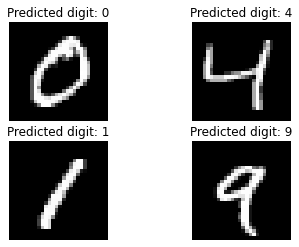

Saved model to disk


In [36]:
X_test, y_test, X_train, y_train = input_data()
model = create_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=256)
test(X_train, model)
model.save("model.h5")
print("Saved model to disk")

Predicted digit: 0
Predicted digit: 4
Predicted digit: 1
Predicted digit: 9


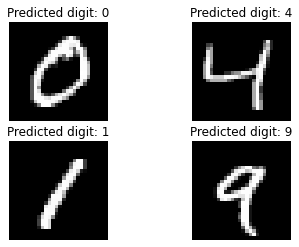

Saved model to disk
